# Planetary Data Analysis Notebook

For the first part of this script, I will solely focus on the kNN supervised learning technique applied to the data pertaining to exoplanets from NASA.

In [1]:
# Import necessary libraries
from random import seed
from random import randrange
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from  sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from math import sqrt
#import plotly.express as px

As a resampling method, will use the train-test-split (tts) method. Will bundle the logic of tts into a function.

In [2]:
seed(1235)
def tts(data, split = 0.80):
    train = list()
    train_size = split*len(data)
    data_copy = list(data)
    while len(train) < train_size :
        index = randrange(len(data_copy))
        train.append(data_copy.pop(index))
    return np.array(train), np.array(data_copy)

In [3]:
# Assign path of data to a variable.
# Initiatiate first data frame with raw data.
path1 = 'J:\\datasets\\PS_2022.02.27_18.46.12.csv'
path2 = 'D:\\PS_2022.04.09_12.16.22.csv'
raw_data = pd.read_csv(path2, skiprows = 20)

Need to remove the first thirteen rows. These rows contain copious notes/remarks.

In [4]:
#raw_data = raw_data.drop(raw_data.index[range(14)])

In [5]:
raw_data

,pl_name,hostname,default_flag,soltype,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim
0,11 Com b,11 Com,1,Published Confirmed,326.030000,0.320000,-0.320000,0.0,0.2310,0.0050,-0.0050,0.0
1,11 UMi b,11 UMi,1,Published Confirmed,516.219970,3.200000,-3.200000,0.0,0.0800,0.0300,-0.0300,0.0
2,14 And b,14 And,1,Published Confirmed,185.840000,0.230000,-0.230000,0.0,0.0000,NaN,NaN,0.0
3,14 Her b,14 Her,1,Published Confirmed,1773.400020,2.500000,-2.500000,0.0,0.3700,0.0000,0.0000,0.0
4,16 Cyg B b,16 Cyg B,1,Published Confirmed,798.500000,1.000000,-1.000000,0.0,0.6800,0.0200,-0.0200,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5004,ups And b,ups And,1,Published Confirmed,4.617033,0.000023,-0.000023,0.0,0.0215,0.0007,-0.0007,0.0
5005,ups And c,ups And,1,Published Confirmed,241.258000,0.064000,-0.064000,0.0,0.2596,0.0079,-0.0079,0.0
5006,ups And d,ups And,1,Published Confirmed,1276.460000,0.570000,-0.570000,0.0,0.2987,0.0072,-0.0072,0.0
5007,ups Leo b,ups Leo,1,Published Confirmed,385.200000,2.800000,-1.300000,0.0,0.3200,0.1340,-0.2180,0.0


In [6]:
raw_data.columns

Index(['pl_name', 'hostname', 'default_flag', 'soltype', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim'],
      dtype='object')

Notice that the columns are not properly named. Now want to create first data frame with columns of interest.

In [7]:
#df1 = raw_data.iloc[:, [0, 1, 5]]
df1 = raw_data.loc[:, ['pl_name','pl_orbper','pl_orbeccen']]
df1.reset_index(drop=True, inplace=True)

In [8]:
df1

,pl_name,pl_orbper,pl_orbeccen
0,11 Com b,326.030000,0.2310
1,11 UMi b,516.219970,0.0800
2,14 And b,185.840000,0.0000
3,14 Her b,1773.400020,0.3700
4,16 Cyg B b,798.500000,0.6800
...,...,...,...
5004,ups And b,4.617033,0.0215
5005,ups And c,241.258000,0.2596
5006,ups And d,1276.460000,0.2987
5007,ups Leo b,385.200000,0.3200


Need to rename the columns of interest to make analysis clearer and remove unnecessary rows.

In [9]:
df1 = df1.rename(columns={'pl_name':'planetname', 'pl_orbper':'orbitperiod', 'pl_orbeccen':'eccentricity'})
#df1 = df1.drop([0])

In [10]:
df1

,planetname,orbitperiod,eccentricity
0,11 Com b,326.030000,0.2310
1,11 UMi b,516.219970,0.0800
2,14 And b,185.840000,0.0000
3,14 Her b,1773.400020,0.3700
4,16 Cyg B b,798.500000,0.6800
...,...,...,...
5004,ups And b,4.617033,0.0215
5005,ups And c,241.258000,0.2596
5006,ups And d,1276.460000,0.2987
5007,ups Leo b,385.200000,0.3200


Data frame 2 will remove all the NA values from original data frame.

In [11]:
df2 = df1.dropna()

In [12]:
df2

,planetname,orbitperiod,eccentricity
0,11 Com b,326.030000,0.2310
1,11 UMi b,516.219970,0.0800
2,14 And b,185.840000,0.0000
3,14 Her b,1773.400020,0.3700
4,16 Cyg B b,798.500000,0.6800
...,...,...,...
5004,ups And b,4.617033,0.0215
5005,ups And c,241.258000,0.2596
5006,ups And d,1276.460000,0.2987
5007,ups Leo b,385.200000,0.3200


The following logic is to determine the data types of the column entries in the latest data.

In [13]:
print(type(df2.iloc[0][1])) # <- Notice the columns are strings and not numeric.
print(type(df2.iloc[0][2]))

<class 'numpy.float64'>
<class 'numpy.float64'>


Now to convert just columns "a" and "b". That is, convert the 'orbitperiod' and 'eccentricity' columns into numerics from string data types.

In [14]:
#df2.loc[:, 'orbitperiod'] = df2.loc[:, 'orbitperiod'].apply(pd.to_numeric)
#df2.loc[:, 'eccentricity'] = df2.loc[:, 'eccentricity'].apply(pd.to_numeric)

In [15]:
#x1 = df2.iloc[:, 1].apply(pd.to_numeric)
#x2 = df2.iloc[:, 2].apply(pd.to_numeric)
#x3 = df2.iloc[:,0] #<- this is the column with the column names

In [16]:
#df2_1 = pd.concat([x3,x1,x2], axis = 1)

In [17]:
df2

,planetname,orbitperiod,eccentricity
0,11 Com b,326.030000,0.2310
1,11 UMi b,516.219970,0.0800
2,14 And b,185.840000,0.0000
3,14 Her b,1773.400020,0.3700
4,16 Cyg B b,798.500000,0.6800
...,...,...,...
5004,ups And b,4.617033,0.0215
5005,ups And c,241.258000,0.2596
5006,ups And d,1276.460000,0.2987
5007,ups Leo b,385.200000,0.3200


In [18]:
print(df2.dtypes['eccentricity'])

float64


In [19]:
print(type(df2))

<class 'pandas.core.frame.DataFrame'>


Dataframe 3 will take the averages of multiple planet entries. Following lines will take arithmetic mean of the two columns of interest and concate the two columns into the third dataframe.

First will create intermediate variables to store the resulting averages.

In [20]:
x4 = df2.groupby('planetname')['eccentricity'].mean()
x5 = df2.groupby('planetname')['orbitperiod'].mean()

In [21]:
x4
x5

planetname
11 Com b       326.030000
11 UMi b       516.219970
14 And b       185.840000
14 Her b      1773.400020
16 Cyg B b     798.500000
                 ...     
ups And b        4.617033
ups And c      241.258000
ups And d     1276.460000
ups Leo b      385.200000
xi Aql b       136.750000
Name: orbitperiod, Length: 1758, dtype: float64

In [22]:
type(x4)

pandas.core.series.Series

In [23]:
type(x5)

pandas.core.series.Series

In [24]:
df3 = pd.concat([x4, x5], axis = 1)
df3

,eccentricity,orbitperiod
planetname,,
11 Com b,0.2310,326.030000
11 UMi b,0.0800,516.219970
14 And b,0.0000,185.840000
14 Her b,0.3700,1773.400020
16 Cyg B b,0.6800,798.500000
...,...,...
ups And b,0.0215,4.617033
ups And c,0.2596,241.258000
ups And d,0.2987,1276.460000


In [25]:
df3['planetname'] = df3.index
df3

,eccentricity,orbitperiod,planetname
planetname,,,
11 Com b,0.2310,326.030000,11 Com b
11 UMi b,0.0800,516.219970,11 UMi b
14 And b,0.0000,185.840000,14 And b
14 Her b,0.3700,1773.400020,14 Her b
16 Cyg B b,0.6800,798.500000,16 Cyg B b
...,...,...,...
ups And b,0.0215,4.617033,ups And b
ups And c,0.2596,241.258000,ups And c
ups And d,0.2987,1276.460000,ups And d


df3 has the final version of the 'raw' data frame. Notice that at this time, dataframe 3 (df3) is not necessary. All the filtering and cleaning was handled by df2.

In [26]:
df3.columns

Index(['eccentricity', 'orbitperiod', 'planetname'], dtype='object')

    In this part want to explicitly declare the median and IQR of the two columns which are the variables.

In [27]:
ecce = df2['eccentricity']
orbper = df2['orbitperiod']
eccen_med = statistics.median(list(ecce))
orbper_med = statistics.median(list(orbper))
print('\nThe median of the orbital period: %.2f' % orbper_med)
print('\nThe median of the eccentricity: %.2f' % eccen_med)
iqr_ecce = stats.iqr(ecce, interpolation = 'midpoint')
iqr_op = stats.iqr(orbper, interpolation = 'midpoint')
print('\nThe interquartile range of the eccentricity: %.2f' % iqr_ecce)
print('\nThe interquartile range of the orbital period: %.2f' % iqr_op)


The median of the orbital period: 18.18

The median of the eccentricity: 0.09

The interquartile range of the eccentricity: 0.21

The interquartile range of the orbital period: 399.10


In [28]:
ecce_mode = statistics.mode(list(ecce))
print('The mode of the eccentricity: \n%.2f' %ecce_mode)

The mode of the eccentricity: 
0.00


In [29]:
ecce_avg = statistics.mean(list(ecce))
ecce_avg

0.15419357224118316

In [30]:
#import plotly.figure_factory as ff
#hist_data = [df2.eccentricity]
#group_labels = ['distirbution']
#fig1 = ff.create_distplot(hist_data, group_labels)
#fig1.show()

(array([894., 335., 209., 114.,  72.,  55.,  29.,  22.,  19.,   9.]),
 array([0.   , 0.095, 0.19 , 0.285, 0.38 , 0.475, 0.57 , 0.665, 0.76 ,
        0.855, 0.95 ]),
 <BarContainer object of 10 artists>)

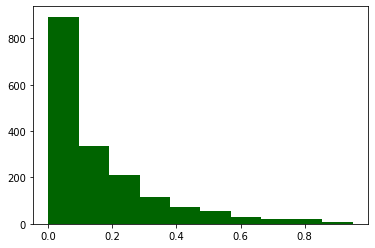

In [31]:
plt.hist(df3.eccentricity, color = "darkgreen")

The next section of code will use Robust Scaling to properly scale the dataframe. I want to use the kNN supervised learning model, but it is distance based and thus sensitive to scale of the data points.

In [32]:
x6 = df3[['orbitperiod', 'eccentricity']]
x6

,orbitperiod,eccentricity
planetname,,
11 Com b,326.030000,0.2310
11 UMi b,516.219970,0.0800
14 And b,185.840000,0.0000
14 Her b,1773.400020,0.3700
16 Cyg B b,798.500000,0.6800
...,...,...
ups And b,4.617033,0.0215
ups And c,241.258000,0.2596
ups And d,1276.460000,0.2987


In [33]:
rs = RobustScaler().fit(x6)
transformer = rs.transform(x6)

In [34]:
type(transformer)

numpy.ndarray

In [35]:
len(transformer)

1758

In [36]:
transformer

array([[ 0.76860204,  0.68780488],
       [ 1.24344198, -0.04878049],
       [ 0.4185951 , -0.43902439],
       ...,
       [ 3.14150382,  1.01804878],
       [ 0.91632949,  1.12195122],
       [ 0.296034  , -0.43902439]])

In [37]:
transformer.shape

(1758, 2)

In [38]:
X = transformer[:, 0]
y = transformer[:, 1]

Now to split the data into training and testing using the test-train-split function defined earlier in the script.

In [39]:
x_train, x_test = tts(X)
y_train, y_test = tts(y)

In [40]:
# Generate random predictions.
def random_algorithm(train, test):
    output_values = [row[-1] for row in train]
    unique = list(set(output_values))
    predicted = list()
    for row in test:
        index = randrange(len(unique))
        predicted.append(unique[index])
    return predicted

In [41]:
# Test the function above against the previous data.
predictions = random_algorithm([x_train], [x_test])
print(predictions)

[-0.017098509590587247]


Did calculations on the training and testing lists before converting them to a dataframe.

In [42]:
x_train, y_train = pd.DataFrame(x_train), pd.DataFrame(y_train)
x_test, y_test = pd.DataFrame(x_test), pd.DataFrame(y_test)
print('\nTraining x shape: ', x_train.shape)
print('Training y shape: ', y_train.shape)
print('Test x shape: ', x_test.shape)
print('Test y shape: ', y_test.shape)


Training x shape:  (1407, 1)
Training y shape:  (1407, 1)
Test x shape:  (351, 1)
Test y shape:  (351, 1)


Want to establish a baseline to compare to the ML model against. Will create a funciton using the Random Prediction Algorithm.

Will run kNN for various values of n_neighbors and store results.

In [43]:
knn_r_acc = []
for j in range(1, 60, 1):
    knn = KNeighborsRegressor(n_neighbors = j)
    knn.fit(x_train, y_train)
    
    test_score = knn.score(x_test, y_test)
    train_score = knn.score(x_train, y_train)
    
    knn_r_acc.append((j, test_score, train_score))
   
results = pd.DataFrame(knn_r_acc, columns = ['k', 'Test Score', 'Train Score'])
print(results)
print(results.iloc[:,1].max())

     k  Test Score  Train Score
0    1   -0.926860     0.999431
1    2   -0.428475     0.480608
2    3   -0.292011     0.336036
3    4   -0.209237     0.242283
4    5   -0.157565     0.181419
5    6   -0.148529     0.161187
6    7   -0.118019     0.150278
7    8   -0.111232     0.125731
8    9   -0.089768     0.115433
9   10   -0.066460     0.104463
10  11   -0.057524     0.095573
11  12   -0.051533     0.085906
12  13   -0.043524     0.082446
13  14   -0.036081     0.074144
14  15   -0.030885     0.063194
15  16   -0.030759     0.059944
16  17   -0.029731     0.056076
17  18   -0.031453     0.051288
18  19   -0.023640     0.047732
19  20   -0.019260     0.047964
20  21   -0.027832     0.044949
21  22   -0.027022     0.041537
22  23   -0.025512     0.037039
23  24   -0.023365     0.035168
24  25   -0.021822     0.039223
25  26   -0.022636     0.037545
26  27   -0.029547     0.034664
27  28   -0.023659     0.034018
28  29   -0.026907     0.036836
29  30   -0.029091     0.034691
30  31  

According to the results above, k = 29 seems to be the best k. What is concerning is that I feel if I extended the 'for' loop to a higher value, perhaps I would see a better performing k value.

Now, by adjusting the range of for loop to 45, found the optimal k to be k = 40.

Will now create the kNN model.

In [44]:
model_knn = KNeighborsRegressor(n_neighbors = 40)
model_knn.fit(x_train, y_train)
y_knn_train_pred = model_knn.predict(x_train)
y_knn_test_pred = model_knn.predict(x_test)

For model performace, first the training mean square error and R2 score.

In [45]:
knn_train_mse = mean_squared_error(y_train, y_knn_train_pred)
knn_train_r2 = r2_score(y_train, y_knn_train_pred)
# Now, test mean square and r2 score.
knn_test_mse = mean_squared_error(y_test, y_knn_test_pred)
knn_test_r2 = r2_score(y_test, y_knn_test_pred)
# Consolidate the results.
knn_results = pd.DataFrame(['k Nearest Neighbor', knn_train_mse, knn_train_r2, knn_test_mse, knn_test_r2]).transpose()
#results1 = pd.DataFrame(columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2'])
results1 = pd.DataFrame()
results1 = pd.concat([results1, knn_results])
print(results1)
#knn_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
#print(knn_results)

                    0         1         2        3         4
0  k Nearest Neighbor  0.760837  0.031253  0.82806 -0.013573


In [46]:
len(y_knn_test_pred)

351

In [47]:
len(y_test)

351

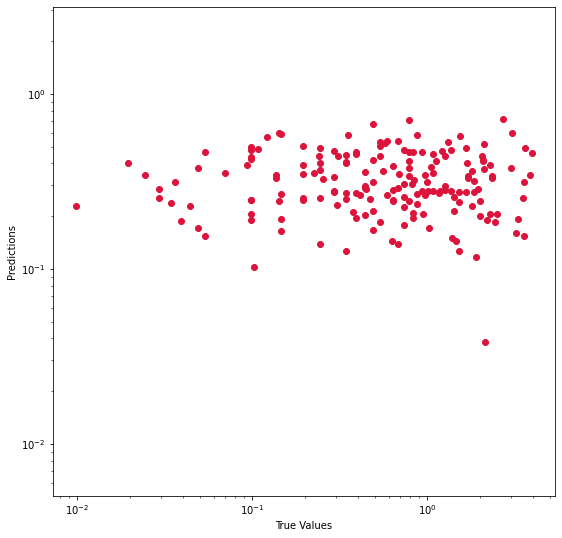

In [48]:
true_values = y_test
predicted_values = y_knn_test_pred
plt.figure(figsize = (9,9))
plt.scatter(true_values, predicted_values, c = 'crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_values), max(true_values))
p2 = min(min(predicted_values), min(true_values))
#plt.plot([p1, p2], [p1, p2], 'b-')

plt.xlabel('True Values', fontsize = 10)
plt.ylabel('Predictions', fontsize = 10)
plt.axis('equal')
plt.show()
plt.close()

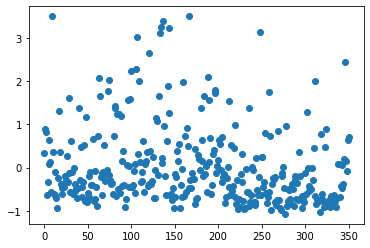

In [49]:
g = plt.plot(true_values - predicted_values, marker = 'o', linestyle = '')

In [50]:
#from yellowbrick.regressor import prediction_error
#model = Lasso()
#visualizer = prediciton_error(model, x_train, y_train, x_test, y_test)

In [51]:
#Set plot size
#plt.subplots(figsize=(10,5))
#Set X-Axis range
#plt.xlim(min(true_values), max(true_values))
#plt.title('Model Error Distribution')
#plt.ylabel('No. of Predictions')
#plt.xlabel('Error')
#plt.hist(predictions['error'], bins=np.linspace(min(test_values), max(test_values), num=41, dtype=int));
#plt.show()

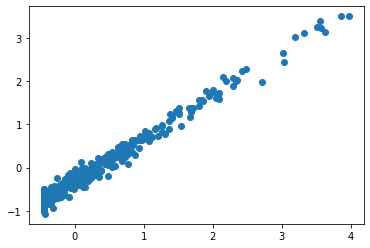

In [52]:
residuals = true_values - predicted_values
plt.scatter(true_values, residuals)


There is an obvious positive linear relationship which indicates that the kNN model is not best supervised learning model for this data.

In [53]:
w1 = x6.iloc[:, 0:1].values
w2 = x6.iloc[:, 1:2].values
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
w3 = sc_X.fit_transform(w1)
w4 = sc_y.fit_transform(w2)
w1_train, w1_test = tts(w3)
w2_train, w2_test = tts(w4)

In [54]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(w1_train, w2_train)
y_svr_train_pred = regressor.predict(w1_train)
y_svr_test_pred = regressor.predict(w1_test)
# Model performance
svr_train_mse = mean_squared_error(w2_train, y_svr_train_pred)
svr_train_r2 = r2_score(w2_train, y_svr_train_pred)
# Test results
svr_test_mse = mean_squared_error(w2_test, y_svr_test_pred)
svr_test_r2 = r2_score(w2_test, y_svr_test_pred)
# Consolidate the results.
#svr_results = pd.DataFrame(['SVR', svr_train_mse, svr_train_r2, svr_test_mse, svr_test_r2]).T
svr_results = pd.DataFrame(['SVR', svr_train_mse, svr_train_r2, svr_test_mse, svr_test_r2])
#results2 = pd.concat([knn_results, svr_results.T], ignore_index = False)
#print(results2)

c:\users\joepb\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
results2 = pd.concat([knn_results,svr_results.T], ignore_index = True)
results2.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
results2

,Method,Training MSE,Training R2,Test MSE,Test R2
0,k Nearest Neighbor,0.760837,0.031253,0.82806,-0.013573
1,SVR,1.162673,-0.1204,0.93,-0.101157


Now want to model using Random Forest.

In [56]:
from sklearn.ensemble import RandomForestRegressor

The line above should be moved to the top of the script.

In [57]:
rf = RandomForestRegressor(max_depth=2)
rf.fit(w1_train, w2_train)
print(rf)

C:\Users\joepb\AppData\Local\Temp\ipykernel_8212\307795354.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(w1_train, w2_train)


RandomForestRegressor(max_depth=2)


Now going to apply the constructed model to make predictions on the training and testing sets.

In [58]:
y_rf_train_pred = rf.predict(w1_train)
y_rf_test_pred = rf.predict(w1_test)

In [59]:
# Model performance metrics for random forest model.
rf_train_mse = mean_squared_error(w2_train, y_rf_train_pred)
rf_train_r2 = r2_score(w2_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(w2_test, y_rf_test_pred)
rf_test_r2 = r2_score(w2_test, y_rf_test_pred)

In [60]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [61]:
results2 = pd.concat([results2, rf_results], ignore_index = True)
results2

,Method,Training MSE,Training R2,Test MSE,Test R2
0,k Nearest Neighbor,0.760837,0.031253,0.82806,-0.013573
1,SVR,1.162673,-0.1204,0.93,-0.101157
2,Random Forest,1.014679,0.022213,0.854878,-0.012209


Will now study the relationship between planet mass and temperature.

In [62]:
path3 = 'D:\\PS_2022.04.14_19.39.14.csv'
raw_data2 = pd.read_csv(path3, skiprows = 28) #  <- notice had to skip first 29 lines.

In [63]:
print(raw_data2)
raw_data2.columns

         pl_name hostname   pl_orbper  pl_orbpererr1  pl_orbpererr2  \
0       11 Com b   11 Com   326.03000          0.320         -0.320   
1       11 Com b   11 Com         NaN            NaN            NaN   
2       11 UMi b   11 UMi         NaN            NaN            NaN   
3       11 UMi b   11 UMi   516.21997          3.200         -3.200   
4       11 UMi b   11 UMi   516.22000          3.250         -3.250   
...          ...      ...         ...            ...            ...   
32320  ups And d  ups And  1282.41000          0.930         -0.940   
32321  ups And d  ups And  1281.50700          1.055         -1.055   
32322  ups Leo b  ups Leo   385.20000          2.800         -1.300   
32323   xi Aql b   xi Aql         NaN            NaN            NaN   
32324   xi Aql b   xi Aql   136.75000          0.250         -0.250   

       pl_orbperlim  pl_bmassj  pl_bmassjerr1  pl_bmassjerr2  pl_bmassjlim  \
0               0.0      19.40           1.50          -1.50         

Index(['pl_name', 'hostname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2',
       'pl_orbperlim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2',
       'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2',
       'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim'],
      dtype='object')

In [64]:
type(raw_data2) #<- already a pandas data frame.

pandas.core.frame.DataFrame

In [65]:
df4 = raw_data2.loc[:, ['pl_name','pl_bmassj','pl_eqt']]
df4.reset_index(drop=True, inplace=True)

In [66]:
df4

,pl_name,pl_bmassj,pl_eqt
0,11 Com b,19.40,NaN
1,11 Com b,17.10,NaN
2,11 UMi b,10.80,NaN
3,11 UMi b,14.74,NaN
4,11 UMi b,10.50,NaN
...,...,...,...
32320,ups And d,4.10,NaN
32321,ups And d,10.25,NaN
32322,ups Leo b,0.51,NaN
32323,xi Aql b,2.02,NaN


In [67]:
df4 = df4.rename(columns={'pl_name':'planetname','pl_bmassj':'planetmass', 'pl_eqt':'temperature'})
df4 = df4.dropna()

In [68]:
df4

,planetname,planetmass,temperature
23,1RXS J160929.1-210524 b,12.00000,1700.0
24,1RXS J160929.1-210524 b,8.00000,1700.0
25,1RXS J160929.1-210524 b,8.00000,1800.0
26,1RXS J160929.1-210524 b,8.00000,1800.0
30,2M0437 b,4.00000,1450.0
...,...,...,...
32265,kap And b,13.61600,1900.0
32284,pi Men c,0.01422,1147.0
32285,pi Men c,0.01517,1170.0
32289,rho CrB b,1.04490,614.0


In [69]:
print(type(df4.iloc[0][1]))
print(type(df4.iloc[0][2]))

<class 'numpy.float64'>
<class 'numpy.float64'>


Notice both of the above are float data type which will make computation easier.

In [70]:
df4.reset_index(drop=True, inplace=True)

In [71]:
df4

,planetname,planetmass,temperature
0,1RXS J160929.1-210524 b,12.00000,1700.0
1,1RXS J160929.1-210524 b,8.00000,1700.0
2,1RXS J160929.1-210524 b,8.00000,1800.0
3,1RXS J160929.1-210524 b,8.00000,1800.0
4,2M0437 b,4.00000,1450.0
...,...,...,...
1145,kap And b,13.61600,1900.0
1146,pi Men c,0.01422,1147.0
1147,pi Men c,0.01517,1170.0
1148,rho CrB b,1.04490,614.0


In [72]:
x7 = df4.groupby('planetname')['planetmass'].mean()
x8 = df4.groupby('planetname')['temperature'].mean()
x8

planetname
1RXS J160929.1-210524 b        1750.0
2M0437 b                       1450.0
2MASS J12073346-3932539 b      1200.0
2MASS J21402931+1625183 A b    2075.0
51 Eri b                        700.0
                                ...  
bet Pic b                      1631.0
kap And b                      1790.0
pi Men c                       1158.5
rho CrB b                       614.0
rho CrB c                       448.0
Name: temperature, Length: 855, dtype: float64

In [73]:
df5 = pd.concat([x7, x8], axis = 1)
df5

,planetmass,temperature
planetname,,
1RXS J160929.1-210524 b,9.000000,1750.0
2M0437 b,4.000000,1450.0
2MASS J12073346-3932539 b,4.500000,1200.0
2MASS J21402931+1625183 A b,20.950000,2075.0
51 Eri b,2.000000,700.0
...,...,...
bet Pic b,13.500000,1631.0
kap And b,13.208000,1790.0
pi Men c,0.014695,1158.5


In [74]:
mass = df5['planetmass']
temp = df5['temperature']
mass_med = statistics.median(list(mass))
temp_med = statistics.median(list(temp))
print('\nThe median of the planet mass: %.2f' % mass_med)
print('\nThe median of the temperature: %.2f' % temp_med)
iqr_mass = stats.iqr(mass, interpolation = 'midpoint')
iqr_temp = stats.iqr(temp, interpolation = 'midpoint')
print('\nThe interquartile range of the planet mass: %.2f' % iqr_mass)
print('\nThe interquartile range of the temperature: %.2f' % iqr_temp)
print(statistics.mean(list(mass)))


The median of the planet mass: 0.58

The median of the temperature: 1192.00

The interquartile range of the planet mass: 1.35

The interquartile range of the temperature: 914.50
1.6814424873294347


(array([0.2896774 , 0.02105327, 0.00740763, 0.00506838, 0.00389875,
        0.00233925, 0.0015595 , 0.00116963, 0.00077975, 0.00038988]),
 array([9.1000000e-04, 3.0008190e+00, 6.0007280e+00, 9.0006370e+00,
        1.2000546e+01, 1.5000455e+01, 1.8000364e+01, 2.1000273e+01,
        2.4000182e+01, 2.7000091e+01, 3.0000000e+01]),
 <BarContainer object of 10 artists>)

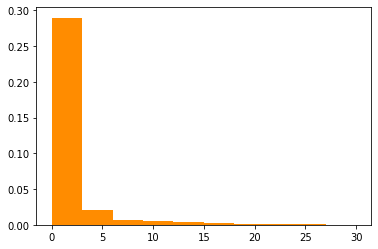

In [75]:
plt.hist(df5.planetmass, density = True, color = "darkorange")

(array([ 99., 170., 180., 214., 128.,  45.,  16.,   0.,   2.,   1.]),
 array([  50.,  450.,  850., 1250., 1650., 2050., 2450., 2850., 3250.,
        3650., 4050.]),
 <BarContainer object of 10 artists>)

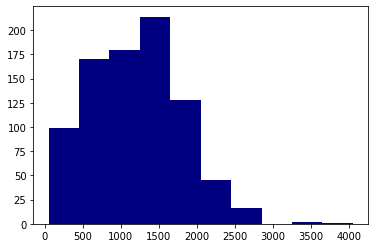

In [76]:
plt.hist(df5.temperature, color = "navy")

Note that the trend in this distribution is not as skewed as the other metrics. That is, it more closely resembles a normal distribution.

In [77]:
x9 = df5[['planetmass', 'temperature']]

In [78]:
x9

,planetmass,temperature
planetname,,
1RXS J160929.1-210524 b,9.000000,1750.0
2M0437 b,4.000000,1450.0
2MASS J12073346-3932539 b,4.500000,1200.0
2MASS J21402931+1625183 A b,20.950000,2075.0
51 Eri b,2.000000,700.0
...,...,...
bet Pic b,13.500000,1631.0
kap And b,13.208000,1790.0
pi Men c,0.014695,1158.5


In [79]:
rs2 = RobustScaler().fit(x9)
transformer2 = rs2.transform(x9)
print(type(transformer2))
len(transformer2)

<class 'numpy.ndarray'>


855

In [80]:
x10 = transformer2[:, 0]
y2 = transformer2[:, 1]

In [81]:
x_train2, x_test2 = tts(x10)
y_train2, y_test2 = tts(y2)

In [82]:
#predictions2 = random_algorithm([x_train2], [x_test2])
predictions2 = random_algorithm([y_train2], [y_test2])
print(predictions2)

[1.2115910333515583]


In [83]:
x_train2, y_train2 = pd.DataFrame(x_train2), pd.DataFrame(y_train2)
x_test2, y_test2 = pd.DataFrame(x_test2), pd.DataFrame(y_test2)
print('\nTraining x2 shape: ', x_train2.shape)
print('Training y2 shape: ', y_train2.shape)
print('Test x2 shape: ', x_test2.shape)
print('Test y2 shape: ', y_test2.shape)


Training x2 shape:  (684, 1)
Training y2 shape:  (684, 1)
Test x2 shape:  (171, 1)
Test y2 shape:  (171, 1)


In [84]:
knn_r_acc2 = []
for n in range(1, 60, 1):
    knn2 = KNeighborsRegressor(n_neighbors = n)
    knn2.fit(x_train2, y_train2)
    
    test_score2 = knn2.score(x_test2, y_test2)
    train_score2 = knn2.score(x_train2, y_train2)
    
    knn_r_acc2.append((n, test_score2, train_score2))
   
outcome = pd.DataFrame(knn_r_acc2, columns = ['k', 'Test Score', 'Train Score'])
print(outcome)
print(outcome.iloc[:,1].max())

     k  Test Score  Train Score
0    1   -0.941746     0.806419
1    2   -0.436195     0.515895
2    3   -0.209873     0.352850
3    4   -0.167804     0.261971
4    5   -0.171014     0.211420
5    6   -0.142327     0.191172
6    7   -0.125960     0.183256
7    8   -0.120098     0.169047
8    9   -0.102322     0.142715
9   10   -0.082044     0.133358
10  11   -0.067033     0.115324
11  12   -0.057830     0.110851
12  13   -0.065697     0.091500
13  14   -0.075816     0.089763
14  15   -0.062944     0.089679
15  16   -0.070666     0.082063
16  17   -0.076534     0.078231
17  18   -0.077869     0.071711
18  19   -0.078116     0.069403
19  20   -0.064464     0.060435
20  21   -0.055018     0.052762
21  22   -0.059333     0.055023
22  23   -0.041023     0.052622
23  24   -0.029020     0.046849
24  25   -0.035643     0.046561
25  26   -0.034044     0.043135
26  27   -0.033405     0.037154
27  28   -0.034297     0.032531
28  29   -0.044177     0.032692
29  30   -0.043541     0.031729
30  31  

The maximum test score for this kNN model occurs when k = 15.
Will not create the second kNN model to help describe the relationship betweeen mass and temperature.

In [85]:
model_knn2 = KNeighborsRegressor(n_neighbors = 15)
model_knn2.fit(x_train2, y_train2)
y_knn_train_pred2 = model_knn2.predict(x_train2)
y_knn_test_pred2 = model_knn2.predict(x_test2)

In [86]:
knn_train_mse_2 = mean_squared_error(y_train2, y_knn_train_pred2)
knn_train_r2_2 = r2_score(y_train2, y_knn_train_pred2)
# Now, test mean square and r2 score.
knn_test_mse_2 = mean_squared_error(y_test2, y_knn_test_pred2)
knn_test_r2_2 = r2_score(y_test2, y_knn_test_pred2)
# Consolidate the results.
knn_results2 = pd.DataFrame(['k Nearest Neighbor', knn_train_mse_2, knn_train_r2_2, knn_test_mse_2, knn_test_r2_2]).transpose()
results3 = pd.DataFrame()
results3 = pd.concat([results3, knn_results2])
print(results2)

               Method Training MSE Training R2  Test MSE   Test R2
0  k Nearest Neighbor     0.760837    0.031253   0.82806 -0.013573
1                 SVR     1.162673     -0.1204      0.93 -0.101157
2       Random Forest     1.014679    0.022213  0.854878 -0.012209


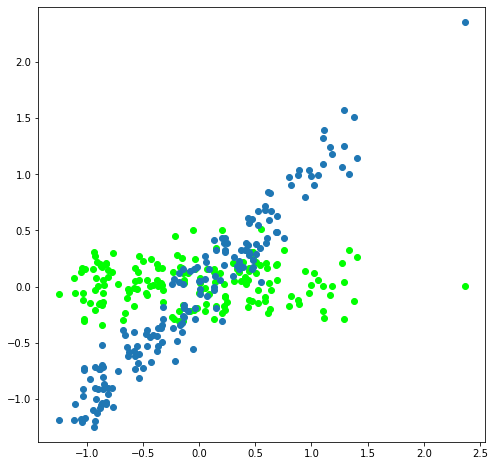

In [87]:
true_values2 = y_test2
predicted_values2 = y_knn_test_pred2
plot2 = plt.figure(figsize=(8,8))
plot2 =plt.scatter(true_values2, predicted_values2, c = 'lime')

residuals2 = true_values2 - predicted_values2
plot2 = plt.scatter(true_values2, residuals2)

plt.axis('equal')
plt.show(plot2)

Notice no pattern so model does describe the data.

In [88]:
w5 = x9.iloc[:, 0:1].values
w6 = x9.iloc[:, 1:2].values
sc2_X = StandardScaler()
sc2_y = StandardScaler()
w7 = sc2_X.fit_transform(w5)
w8 = sc2_y.fit_transform(w6)
w3_train, w3_test = tts(w7)
w4_train, w4_test = tts(w7)

In [89]:
regressor2 = SVR(kernel = 'rbf')
regressor2.fit(w3_train, w4_train)
y_svr_train_pred2 = regressor2.predict(w3_train)
y_svr_test_pred2 = regressor2.predict(w3_test)
# Model performance
svr_train_mse_2 = mean_squared_error(w4_train, y_svr_train_pred2)
svr_train_r2_2 = r2_score(w4_train, y_svr_train_pred2)
# Test results
svr_test_mse_2 = mean_squared_error(w4_test, y_svr_test_pred2)
svr_test_r2_2 = r2_score(w4_test, y_svr_test_pred2)
# Consolidate the results.
#svr_results = pd.DataFrame(['SVR', svr_train_mse, svr_train_r2, svr_test_mse, svr_test_r2]).T
svr_results2 = pd.DataFrame(['SVR', svr_train_mse_2, svr_train_r2_2, svr_test_mse_2, svr_test_r2_2])
#results2 = pd.concat([knn_results, svr_results.T], ignore_index = False)
#print(results2)

c:\users\joepb\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
results3 = pd.concat([knn_results2,svr_results.T], ignore_index = True)
results3.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
results3

,Method,Training MSE,Training R2,Test MSE,Test R2
0,k Nearest Neighbor,0.371051,0.089679,0.498995,-0.062944
1,SVR,1.162673,-0.1204,0.93,-0.101157


Now to add the Random Forest Regressor.

In [91]:
rf2 = RandomForestRegressor(max_depth=2)
rf2.fit(w3_train, w4_train)
y_rf_train_pred2 = rf2.predict(w3_train)
y_rf_test_pred2 = rf2.predict(w3_test)

C:\Users\joepb\AppData\Local\Temp\ipykernel_8212\3546261006.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(w3_train, w4_train)


In [93]:
some_prediction = random_algorithm(w3_train, w3_test)
print(some_prediction)

[0.3084812431683216, -0.3806181727442102, 0.05652793472684643, -0.4721555142845351, -0.12425212274246057, -0.4654367593927624, -0.37734420319949047, -0.36766464106727564, -0.3727891151372717, -0.46485598566482955, -0.47442451752552783, -0.22531813912293935, -0.3192668304062013, 0.13624197581567482, -0.272577177768459, -0.4634666838058528, -0.4552077397630424, -0.28054858187734183, -0.47442167059548895, -0.46910929914292626, -0.36766464106727564, 5.784551172966938, 0.07076258492128007, -0.38076051924615456, -0.22560283212682805, 0.436877787922113, 0.07531767298349884, -0.23955278931737298, 0.23019066709893676, 0.7483319341763207, -0.47442451752552783, -0.1399102379563376, -0.3462177681076623, -0.4770465400913425, -0.47661807712049004, -0.2821143933987295, -0.45695575480691886, -0.47045305012128086, -0.3819533829324481, -0.47442451752552783, 2.47926539781945, 0.19033364655452245, -0.4550483116808648, -0.4583621382461289, 2.0443968343795027, 0.7144534667135687, 1.232310040787064, -0.15699

In [97]:
some_r2 = r2_score(w3_test, some_prediction)
print(some_r2)

-0.47584579079882494


In [98]:
# Model performance metrics for random forest model.
rf2_train_mse = mean_squared_error(w4_train, y_rf_train_pred2)
rf2_train_r2 = r2_score(w4_train, y_rf_train_pred2)
rf2_test_mse = mean_squared_error(w4_test, y_rf_test_pred2)
rf2_test_r2 = r2_score(w4_test, y_rf_test_pred2)

In [99]:
rf_results2 = pd.DataFrame(['Random Forest', rf2_train_mse, rf2_train_r2, rf2_test_mse, rf2_test_r2]).transpose()
rf_results2.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [100]:
results3 = pd.concat([results3, rf_results2], ignore_index = True)
results3

,Method,Training MSE,Training R2,Test MSE,Test R2
0,k Nearest Neighbor,0.371051,0.089679,0.498995,-0.062944
1,SVR,1.162673,-0.1204,0.93,-0.101157
2,Random Forest,0.954107,0.042398,1.035965,-0.021127


Random Forest model seems to be the best performing of the trio in this scenario. Still need to do further exploraiton of the interpretation of the R2 value.

In [101]:
rf2_rmse = sqrt(rf2_test_mse)
print('The Random Forest 2 model RMSE is: ', rf2_rmse)

The Random Forest 2 model RMSE is:  1.0178236568576704
